# ⚙️ 초기 셋팅

## 1️⃣ 라이브러리 추가

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2️⃣ 한글 설정

In [2]:
# 한글
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings

warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 89 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## 3️⃣ 파일 마운트

In [3]:
# 파일 마운트
# 드라이브 마운트 코드
from google.colab import drive

# Restart the runtime before running this cell.
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 🔎 문제 파악

## 1️⃣ 핵심 요소
- 예약이 취소되는 이유
- 취소율이 높게 나타나는 조건
- 취소율을 줄이기 위한 방법

## 2️⃣ 분석 목표
- 예약취소에 영향을 주는 요인 파악
- City Hotel, Resort Hotel 비교

---

# 🗺️ 데이터 탐색
- 핵심 데이터
    - `hotel`
    - `is_canceled`
    - `lead_time`
    - `adults`
    - `children`
    - `babies`
    - `country`
    - `is_repeated_guest` -> 이전에 방문을 하였던 손님인지(1) 아닌지(0)를 나타나는 값
    - `previous_cancellations` -> 현재 예약 이전에 고객이 취소한 이전 예약 수
    - `previous_bookings_not_canceled` -> 현재 예약 이전에 고객이 취소하지 않은 이전 예약 수
    - `booking_changes` -> 예약 시점부터 예약 취소/체크인 시점까지 에약에 대한 변경/수정 횟수
    - `required_car_parking_spaces` -> 고객이 요구하는 주차 공간 수 (adult가 많으면 이것도 확인)
    - `reservation_status`
        - `Canceled`: 고객이 예약을 취소함
        - `Check-Out`: 고객이 체크인을 하고 체크아웃을 함
        - `No-Show`: 노쇼. 고객이 체크인을 하지 않았고 해당 이유를 알 수 없음.






## 1️⃣ 호텔 데이터 프레임 생성

In [4]:
# 모든 컬럼 탐색
pd.set_option('display.max_columns', None)
df = pd.read_csv("/content/drive/MyDrive/코드잇/스프린트 미션 제출용/data/hotel_data_modified.csv")

## 2️⃣ 데이터 구조 파악

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,NaN,NaN,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,NaN,NaN,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,NaN,NaN,0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,304.0,NaN,0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,240.0,NaN,0,0,1,Check-Out,2015-07-03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [30]:
# 데이터 타입 확인
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


- is_canceled: mean 같은 소수점 데이터
    - 0에 가까울수록 0이 더 많다
        0: 예약 취소 안했음

In [8]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,NaN,NaN,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,NaN,NaN,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,NaN,NaN,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,86.693382,189.266735,2.321149,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,110.774548,131.655015,17.594721,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,9.000000,62.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,14.000000,179.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,229.000000,270.000000,0.000000,0.000000,1.000000,NaN,NaN


In [9]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


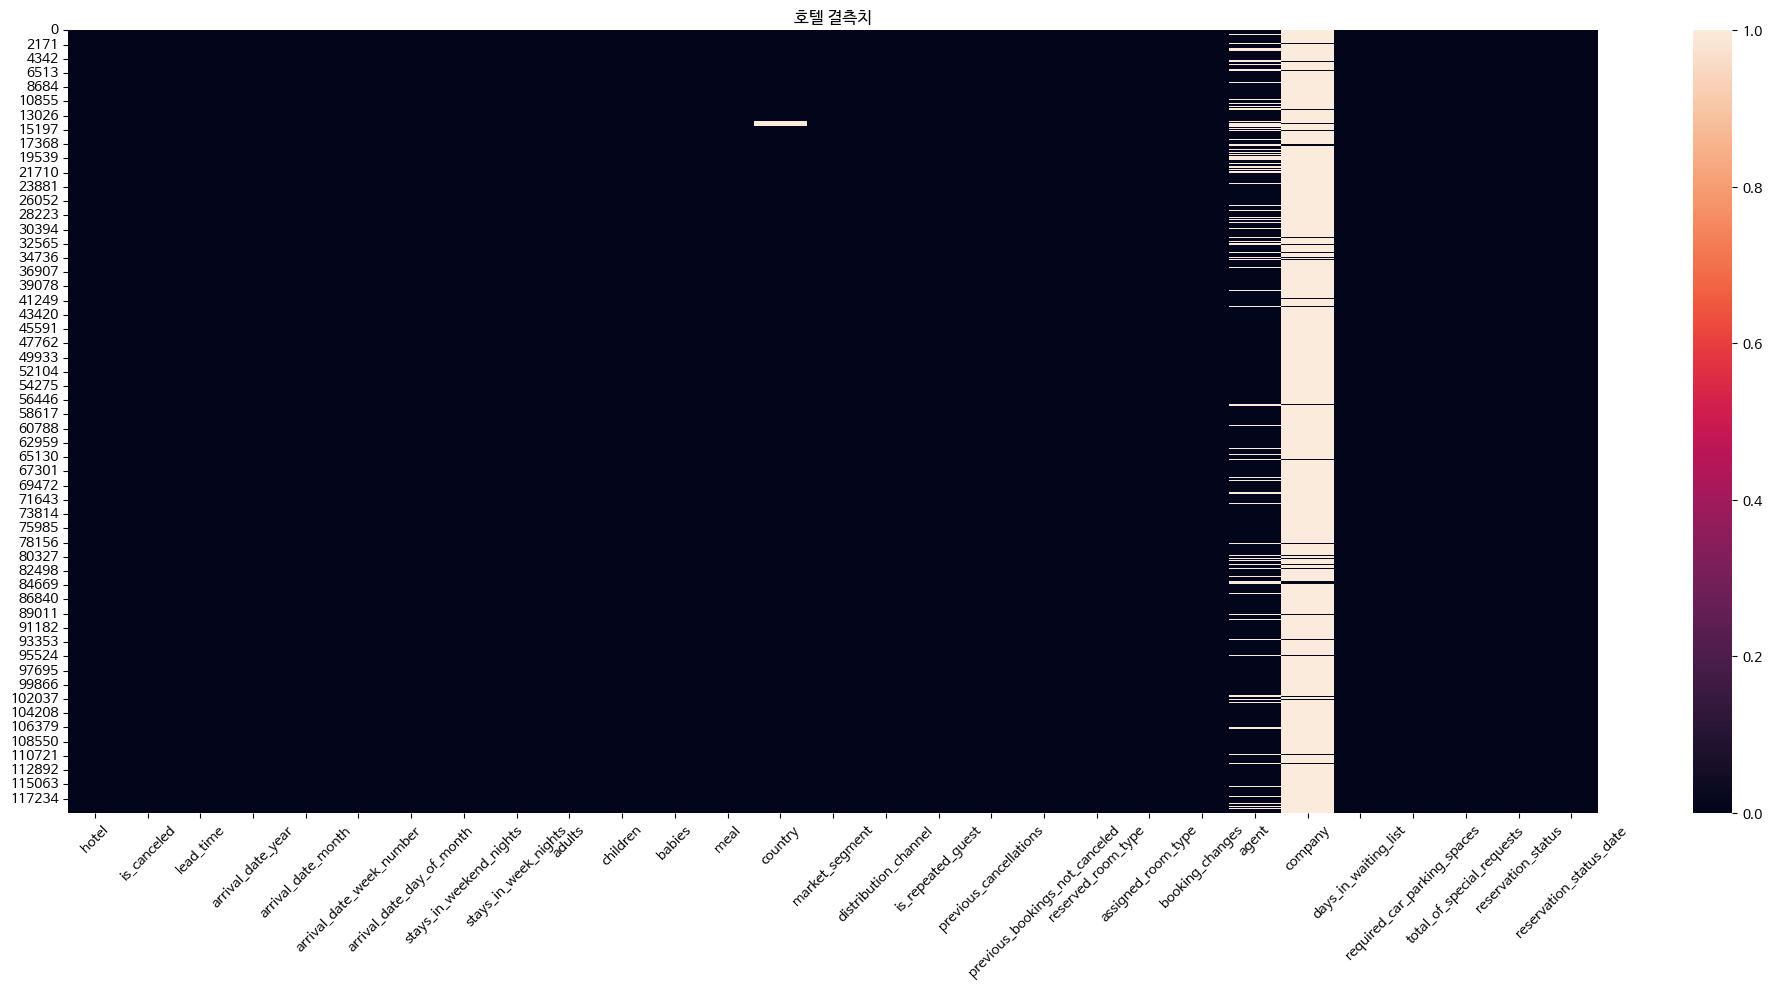

In [10]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull())
plt.title("호텔 결측치")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# company & agent 결측치 비율 확인
print(f"company값 결측비: {df['company'].isnull().mean()}")
print(f"agent 결측비: {df['agent'].isnull().mean()}")
print(f"country 결측비: {df['country'].isnull().mean()}")

company값 결측비: 0.943068933746545
agent 결측비: 0.13686238378423654
country 결측비: 0.004087444509590418


## 3️⃣ 결측치 확인 결과
1. agent, company는 결측치가 많으므로 `삭제`시킴
2. children 결측치는 `0으로 대체`
3. country 결측치는 `UNKNOWN`으로 대체

```python
{
    "country": "object (범주형)",
    "agent": "float64 (수치형)",
    "company": "float64 (수치형)"
}
```
---

# 2. 🛠️ 데이터 전처리

## 1️⃣ 결측치 처리

### 1️⃣−1️⃣ agent, company는 결측치가 많으므로 삭제시킴

In [12]:
df.drop(['agent', 'company'], axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### 1️⃣−2️⃣ 결측치 대체
- children 결측치는 -99로
- country 결측치는 UNKNOWN으로 대체

In [14]:
df.fillna({
    'country': 'UNKNOWN',
    'children': -99,
}, inplace=True)

In [15]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


---
## 2️⃣ 이상치 탐색

### 2️⃣−1️⃣ 성인 수에 대한 이상치 분석
- 예약한 성인 수가 10명 이상인 데이터
    - 공통적으로 주차 공간 요구가 모두 0
        - 성인이 10명이면 차량 1~2대정도는 있지 않을까?
    - reservation_status가 모두 취소됨


In [16]:
# adults 이상치
df[df['adults'] >= 10].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1539,Resort Hotel,1,304,2015,September,36,3,0,3,40,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,0,0,0,Canceled,2015-01-02
1587,Resort Hotel,1,333,2015,September,36,5,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,0,0,0,Canceled,2015-01-02
1643,Resort Hotel,1,336,2015,September,37,7,1,2,50,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,0,0,0,Canceled,2015-01-18
1752,Resort Hotel,1,340,2015,September,37,12,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,0,0,0,Canceled,2015-01-02
1884,Resort Hotel,1,347,2015,September,38,19,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,0,0,0,Canceled,2015-01-02


In [33]:
# 한 사람이 예약을 1주일 간격으로 바꿈
df[(df['adults'] == 26) & (df['reservation_status_date'] == '2015-01-02') & (df['country'] == 'PRT')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1587,Resort Hotel,1,333,2015,September,36,5,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,0,0,0,Canceled,2015-01-02
1752,Resort Hotel,1,340,2015,September,37,12,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,0,0,0,Canceled,2015-01-02
1884,Resort Hotel,1,347,2015,September,38,19,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,0,0,0,Canceled,2015-01-02
2003,Resort Hotel,1,354,2015,September,39,26,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,0,0,0,Canceled,2015-01-02
2164,Resort Hotel,1,361,2015,October,40,3,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,0,0,0,Canceled,2015-01-02


#### 2️⃣−1️⃣−1️⃣ 🤔 왜?
- 도착 예정일을 1주일 간격으로 반복적으로 예약을 취소함 (이와 같은 고객이 더 있을 것으로 가정한다면)
    - 예약 테스트
    - 자동예약 프로그램
    - 객실 사전확보

#### 📈 빈번한 취소에 따른 인사이트
- 실제 투숙 목적이 아닌 비정상적인 예약은 다른 고객들에게 피해를 끼칠 우려가 있음
    - 예약을 취소하고 특정 시간(5~10분)이내 같은 유저 ID나 IP에서는 예약을 할 수 없다는 알림 문구와 함께 예약에 패널티를 주는 시스템 도입
    - 자동 예약 프로그램 방지 서비스 도입으로 무분별한 예약 예방
    - 인기있는 객실을 한 사람 혹은 단체가 예약을 한다는 것은 부정적인 방법으로 해당 객실을 2차 판매할 가능성이 있음
        - 단체예약을 위한 여러 객실이 필요할 경우 객실 1개당 최소 성인 1명 인증 시스템 도입으로 무분별한 객실 예약을 방지함
        - 해당 방법으로 객실을 2차 판매를 한다고 해도 판매가 원만하게 이루어지지 않는다면 수많은 객실 예약을 취소할 수 있으니 단체 객실 예약 건에 대해서 취소 수수료를 부과하는 규정 도입
---

### 2️⃣−2️⃣ 수치형 데이터 이상치 분석

In [18]:
# 수치형 컬럼만 선택
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols.tolist())


['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']


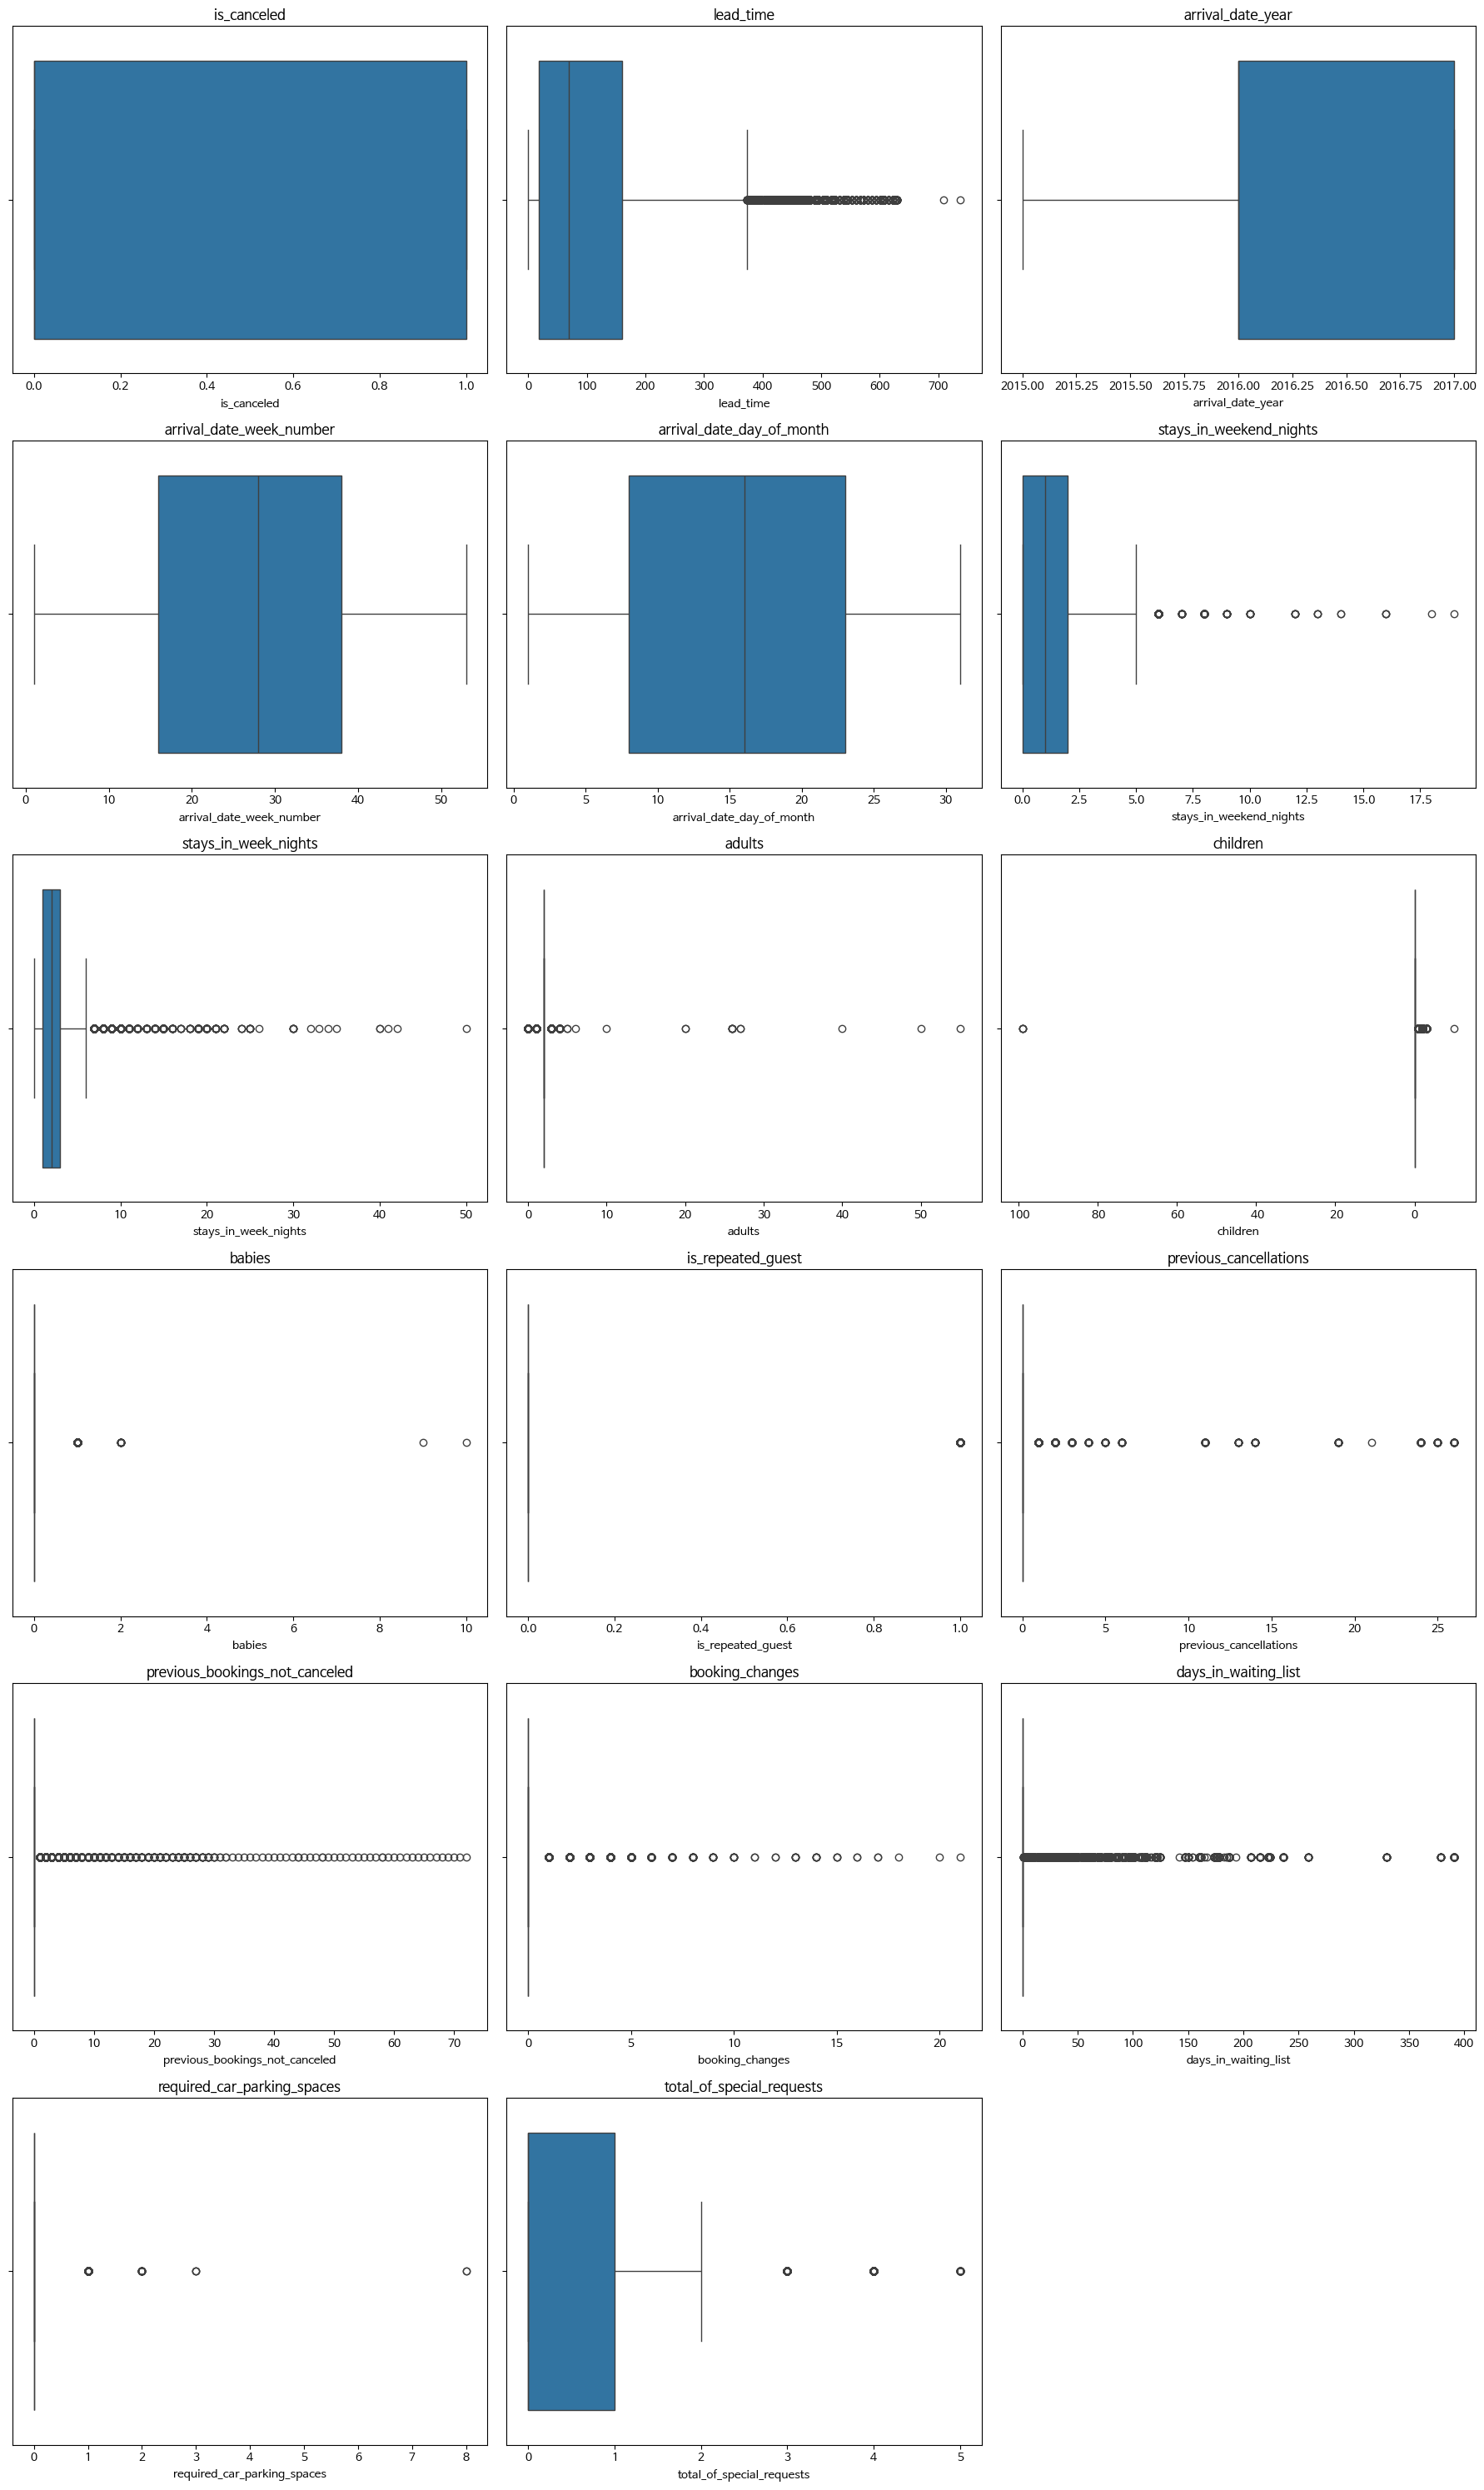

In [19]:
import math

num_cols = len(numerical_cols)
cols_per_row = 3
rows = math.ceil(num_cols / cols_per_row)

plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(data=df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

---
### 2️⃣−3️⃣ 히트맵 시각화
- 컬럼간 상관관계 분석
    - 0.0 ~ ±0.1: 거의 무관
    - ±0.1 ~ ±0.3: 약한 상관
    - ±0.3 ~ ±0.7: 중간
    - ±0.7 이상: 강한 상관

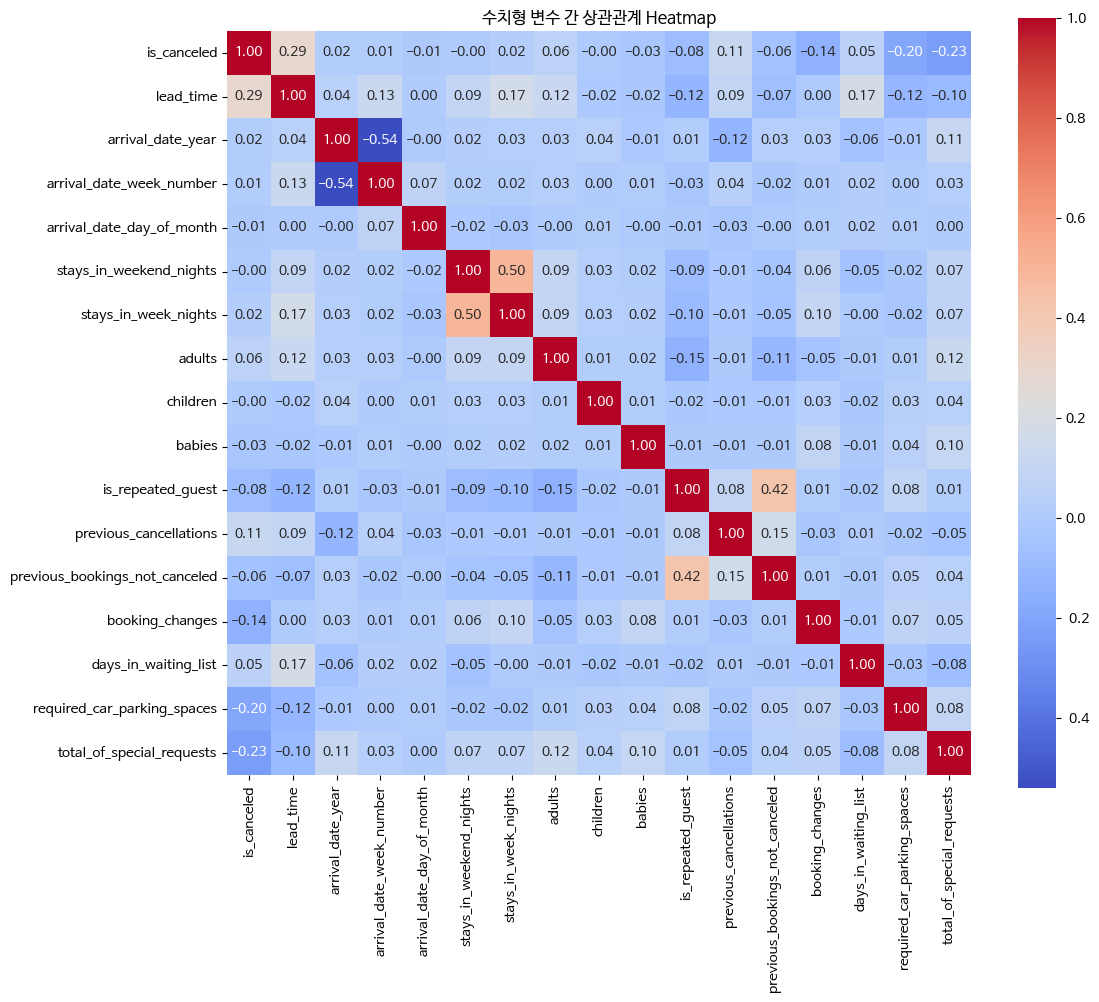

In [20]:
# 수치형 변수만 선택
numeric_cols = df.select_dtypes(include='number')

# 상관관계 행렬
corr_matrix = numeric_cols.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("수치형 변수 간 상관관계 Heatmap")
plt.show()

#### 2️⃣−3️⃣−1️⃣ 약한 상관관계
- lead_time
    - 예약 시간에 따른 취소율 분석(4)
- previous_cancellations
    - 이전 예약 취소에 따른 취소율 분석(5)

### 2️⃣−4️⃣ 취소는 안했지만 노쇼 고객 수

- 데이터 없음
    - 해당 고객도 예약 취소(is_canceled = 1)으로 분류됐다고 가정

In [21]:
no_show_df = df[(df['is_canceled'] == 0) & (df['reservation_status'] == 'No-Show')]
no_show_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


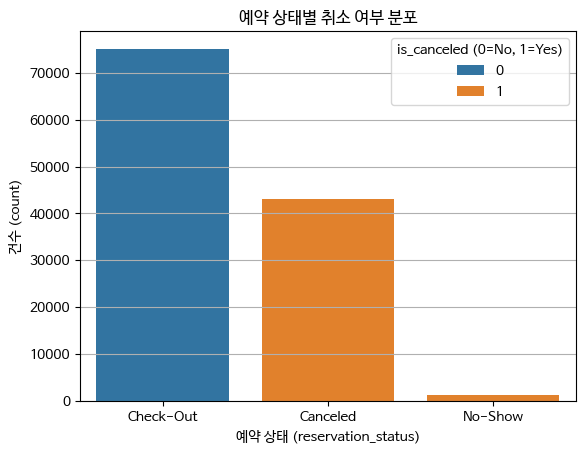

In [22]:
sns.countplot(data=df, x='reservation_status', hue='is_canceled')
plt.title('예약 상태별 취소 여부 분포')
plt.xlabel('예약 상태 (reservation_status)')
plt.ylabel('건수 (count)')
plt.legend(title='is_canceled (0=No, 1=Yes)')
plt.grid(True, axis='y')
plt.show()

# 📊 데이터 분석
---
### 목차
[3-1. 국가별](#📊-3-1.-국가에따른-예약-취소-분석)

[3-2. 예약 시간별](#📊-3-2.-시간에-따른-예약-취소-분석)

[3-3. 취소 빈도](#📊-3-3-취소-빈도에-따른-취소율-분석)

---

## 1️⃣ 국가에따른 예약 취소 분석

In [23]:
cancel_of_country = df[df['is_canceled'] == 1]['country'].value_counts().reset_index()
cancel_of_country.columns = ['country', 'cancellation_count']
cancel_of_country

,country,cancellation_count
0,PRT,27519
1,GBR,2453
2,ESP,2177
3,FRA,1934
4,ITA,1333
...,...,...
123,TMP,1
124,LIE,1
125,UMI,1
126,GNB,1


### 1️⃣−1️⃣ 국가에 따른 취소율
- 호텔은 포르투갈에 있다
    1. 포르투갈
    2. 브라질
    3. 이탈리아
    4. 스페인

-> 자국민 취소율이 가장 높음

-> 이웃 나라일수록 취소율이 높음 = 가까울수록 취소율이 높음

In [24]:
top10_cancel_countries = cancel_of_country.head(10)
top10_cancel_countries

,country,cancellation_count
0,PRT,27519
1,GBR,2453
2,ESP,2177
3,FRA,1934
4,ITA,1333
5,DEU,1218
6,IRL,832
7,BRA,830
8,USA,501
9,BEL,474


Text(0.5, 1.0, '상위 10개 국가의 예약 취소율')

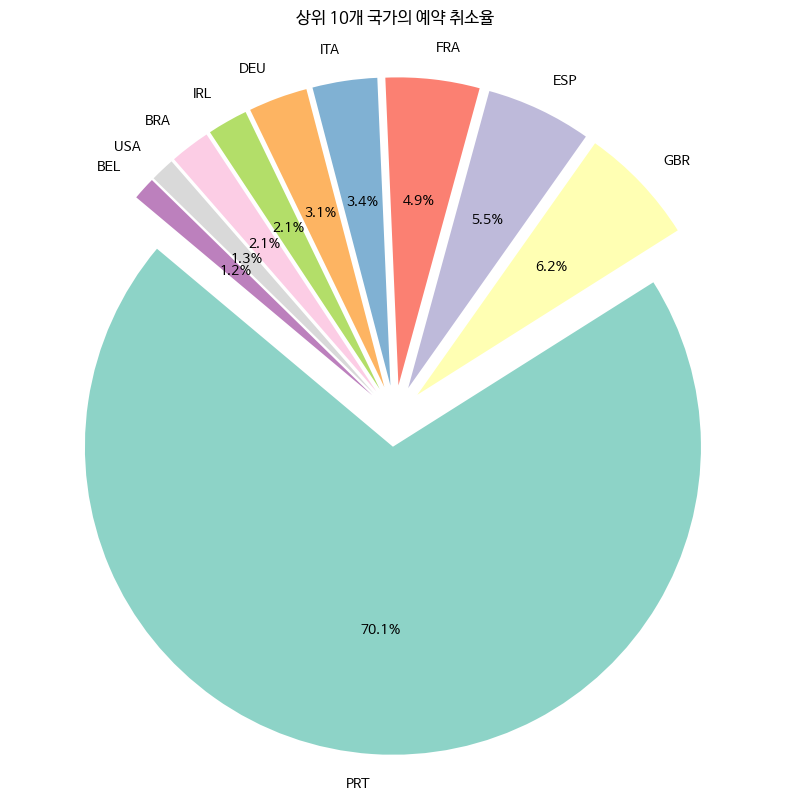

In [32]:
# 파이차트 컬러 참고
# https://seaborn.pydata.org/generated/seaborn.color_palette.html

total_canceled = cancel_of_country['cancellation_count'].sum()
top10_cancel_countries['rate'] = (top10_cancel_countries['cancellation_count'] / total_canceled) * 100

# pie 차트 - 가장 큰 값 강조
explode = [0.1] * len(top10_cancel_countries)

plt.figure(figsize=(10, 10))

plt.pie(
    top10_cancel_countries['rate'],
    labels=top10_cancel_countries['country'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set3"),
    explode=explode)

plt.title('상위 10개 국가의 예약 취소율')


### 📈 국가에 따른 인사이트
1. 가장 많은 예약 취소가 발생하는 포르투갈에서 예약 취소에 수수료 및 예약 보증금 정책 실시
    - 노쇼는 예약 보증금 반환 x
2. 유럽
3. 유럽 외
---

## 2️⃣ 시간에 따른 예약 취소 분석

### 2️⃣−1️⃣ lead_time에 따른 취소율 분석
- lead_time: 체크인까지 남은 시간

In [26]:
print("취소한 예약의 평균 lead_time:", df[df['is_canceled'] == 1]['lead_time'].mean())
print("취소하지 않은 예약의 평균 lead_time:", df[df['is_canceled'] == 0]['lead_time'].mean())

취소한 예약의 평균 lead_time: 144.84881512301013
취소하지 않은 예약의 평균 lead_time: 79.98468722560732


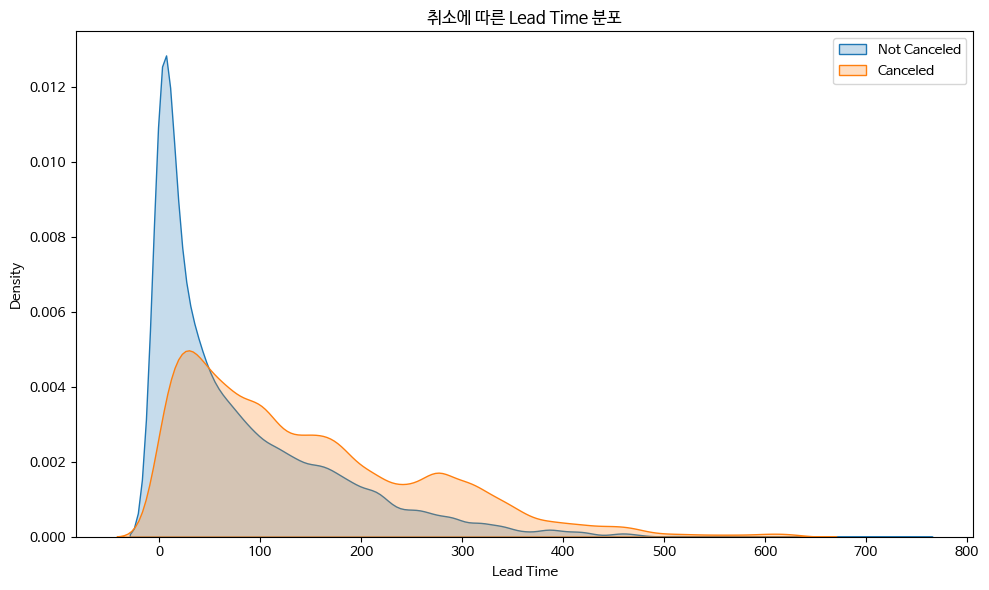

In [27]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df[df['is_canceled'] == 0]['lead_time'], label='Not Canceled', shade=True)
sns.kdeplot(df[df['is_canceled'] == 1]['lead_time'], label='Canceled', shade=True)
plt.title('취소에 따른 Lead Time 분포')
plt.xlabel('Lead Time')
plt.legend()

plt.tight_layout()

plt.show()

#### 2️⃣−1️⃣−1️⃣ lead_time이 짧을 때
- 예: 0~50일

- 파란색(Not Canceled)이 더 높음
    - 취소되지 않은 예약이 더 많음







#### 2️⃣−1️⃣−2️⃣ lead_time이 길때
- 예: 100일 이상

- 주황색(Canceled) 곡선이 파란색보다 상대적으로 더 강하게 유지됨

    - 비율상 Canceled이 더 많이 분포함

### ‼️ 결론
- 예약을 일찍 한 사람들(리드타임이 긴 사람들)이 나중에 그 예약을 취소할 가능성이 더 높은 경향이 있음

### 📈 리드타임에 따른 인사이트
1. 예약을 체크인 기준 1~3달 전에 하게되면 기간에 따른 숙박비 할인 쿠폰 제공
    - 조금 더 싼 값에 숙소를 예약할 수 있음
    - 예약 취소시 할인 쿠폰 압수

---

## 3️⃣ 취소 빈도에 따른 취소율 분석

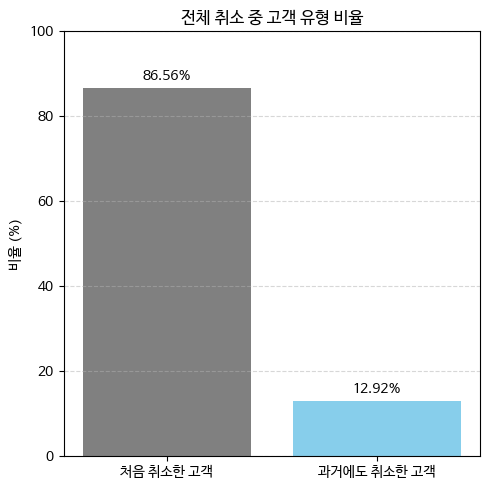

In [28]:
# 전체 취소된 예약
total_canceled = df[df['is_canceled'] == 1]

# 이번 예약 취소 - 과거에도 취소 경험이 있는 고객
repeated_cancellations = df[(df['is_canceled'] == 1) & (df['previous_cancellations'] == 1)]

# 이번 예약 취소 - 과거에 취소 경험이 없는 고객
first_cancellations = df[(df['is_canceled'] == 1) & (df['previous_cancellations'] == 0)]

# 전체 취소 중에서 이번에만 취소 경험이 있는 고객의 비율
first_cancellations_percentage = (len(first_cancellations) / len(total_canceled)) * 100

# 전체 취소 중에서 이번에도, 과거에도 취소 경험이 있는 고객의 비율
cancellations_percentage = (len(repeated_cancellations) / len(total_canceled)) * 100

labels = ['처음 취소한 고객', '과거에도 취소한 고객']

# 막대그래프
plt.figure(figsize=(5, 5))
bars = plt.bar(labels, [first_cancellations_percentage, cancellations_percentage], color=['gray', 'skyblue'])

plt.title('전체 취소 중 고객 유형 비율')
plt.ylabel('비율 (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 각 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [29]:
df[(df['is_canceled'] == 1) & (df['previous_cancellations'] == 0)].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,0,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,0,0,2,Canceled,2015-05-29



### 📈 예약 취소 빈도에 따른 인사이트
- 첫 방문 고객에게 호텔 만족도 및 개선사항 설문 진행
    - 설문을 완료하면 10% 미만의 숙박 쿠폰 지급
    - 고객 개선사항 반영
- 취소 누적 횟수에 따른 패널티 추가
    - 예약을 꺼리게되는 부작용 발생 가능성 있음
---

# 🩺 미션 2에서 미흡했던 점
1. 데이터 전처리
    - 중복 제거
    - 필요없는 데이터 제거 및 가공
    - 이상치 처리
2. 데이터 시각화